In [24]:
import pickle
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from utils.util import *
import seaborn as sns
sns.set_theme()
sns.set_style("darkgrid")
sns.set_context("talk")


In [38]:
ctx_order = 'first'
ctx_order_str = 'ctxF'
analyze_name = 'analyze_dim_red'
dimred_method = 'pca'

In [39]:
with open('../../results/%s_%s_results_mlp.P' %(analyze_name, dimred_method), 'rb') as f:
    mlp_results = pickle.load(f)

with open('../../results/%s_%s_%s_results_rnn.P' %(analyze_name, dimred_method, ctx_order_str), 'rb') as f:
    rnn_results = pickle.load(f)

with open('../../results/%s_%s_%s_results_rnncell.P' %(analyze_name, dimred_method, ctx_order_str), 'rb') as f:
    rnncell_results = pickle.load(f)

with open('../../results/%s_%s_results_stepwisemlp.P' %(analyze_name, dimred_method), 'rb') as f:
    swmlp_results = pickle.load(f)

# with open('../../results/%s_%s_results.P' %(analyze_name, dimred_method), 'rb') as f:
#     results = pickle.load(f)

In [40]:
mlp_results.keys()

dict_keys(['embed_2d', 'hidd_2d', 'avg_hidd_2d', 'ctx_hidd_2d', 'incong_cong_2d', 'grid_locations', 'samples_res'])

In [41]:
# n_states = embed_2d_mlp.shape[0]
locs = [(i,j) for i in range(4) for j in range(4)]
dim1, dim2 = 0, 1

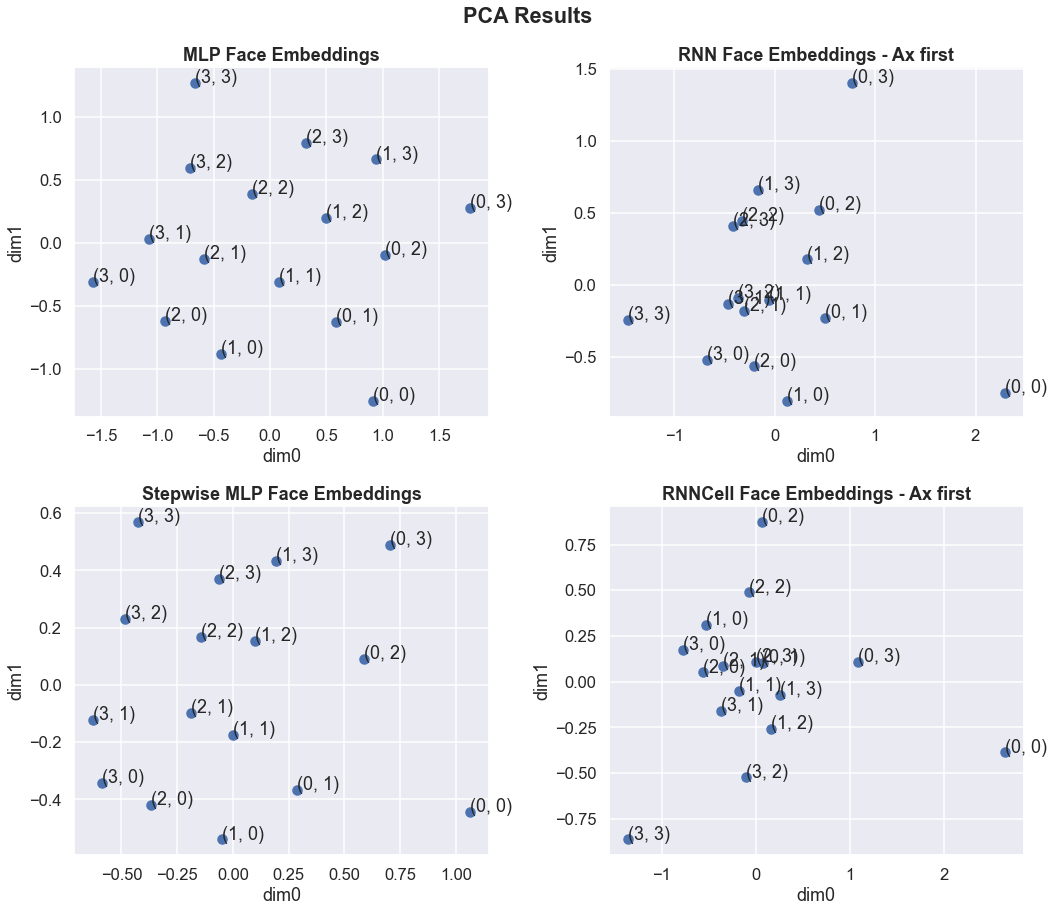

In [42]:
fig, axs = plt.subplots(2, 2, figsize=[15,13])

# plot embeddins
# mlp
embed_2d = mlp_results['embed_2d']
ax = axs[0][0]
ax.scatter(embed_2d[:, dim1], embed_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (embed_2d[i, dim1], embed_2d[i, dim2]))
ax.set_title("MLP Face Embeddings", fontweight='bold')

# RNN
embed_2d = rnn_results['embed_2d']
ax = axs[0][1]
ax.scatter(embed_2d[:, dim1], embed_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (embed_2d[i, dim1], embed_2d[i, dim2]))
ax.set_title("RNN Face Embeddings - Ax %s" %(ctx_order), fontweight='bold')


# Stepwise MLP
embed_2d = swmlp_results['embed_2d']
ax = axs[1][0]
ax.scatter(embed_2d[:, dim1], embed_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (embed_2d[i, dim1], embed_2d[i, dim2]))
ax.set_title("Stepwise MLP Face Embeddings", fontweight='bold')


# RNNCell
embed_2d = rnncell_results['embed_2d']
ax = axs[1][1]
ax.scatter(embed_2d[:, dim1], embed_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (embed_2d[i, dim1], embed_2d[i, dim2]))
ax.set_title("RNNCell Face Embeddings - Ax %s" %(ctx_order), fontweight='bold')


for ax in axs.flatten():
    ax.set_xlabel('dim%s' %(dim1))
    ax.set_ylabel('dim%s' %(dim2))

fig_str = '%s_pca_results_all_models_embeds' %(ctx_order_str)
fig.suptitle('PCA Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)

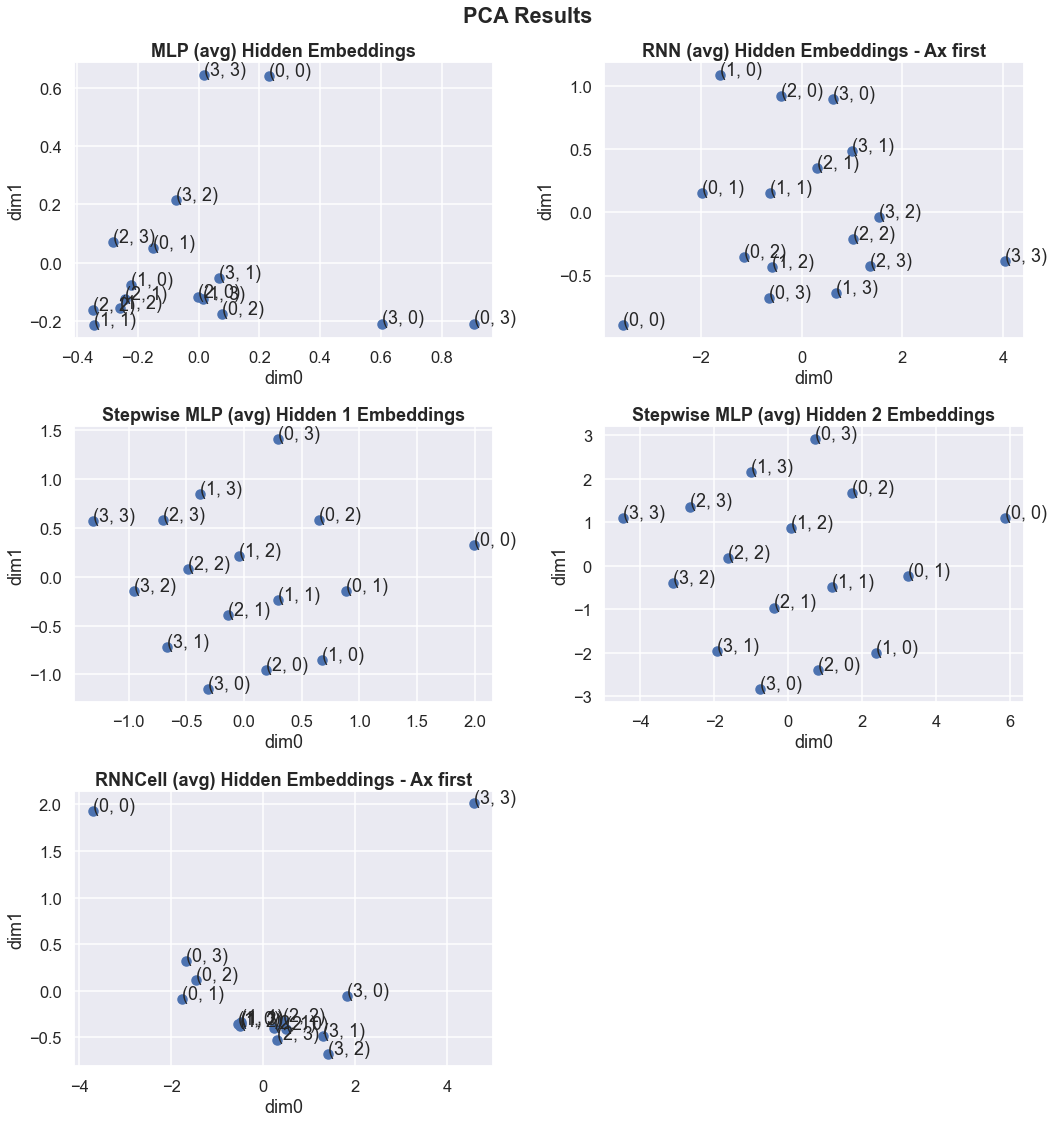

In [43]:
fig, axs = plt.subplots(3, 2, figsize=[15,16])

# plot embeddins
# MLP
avg_hidd_2d = mlp_results['avg_hidd_2d']
ax = axs[0][0]
ax.scatter(avg_hidd_2d[:, dim1], avg_hidd_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (avg_hidd_2d[i, dim1], avg_hidd_2d[i, dim2]))
ax.set_title("MLP (avg) Hidden Embeddings", fontweight='bold')

# RNN
avg_hidd_2d = rnn_results['avg_hidd_2d']
ax = axs[0][1]
ax.scatter(avg_hidd_2d[:, dim1], avg_hidd_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (avg_hidd_2d[i, dim1], avg_hidd_2d[i, dim2]))
ax.set_title("RNN (avg) Hidden Embeddings - Ax %s" %(ctx_order), fontweight='bold')

# Stepwise MLP
avg_hidd_2d = swmlp_results['avg_hidd_2d']
ax = axs[1][0]
ax.scatter(avg_hidd_2d[0, :, dim1], avg_hidd_2d[0, :, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (avg_hidd_2d[0, i, dim1], avg_hidd_2d[0, i, dim2]))
ax.set_title("Stepwise MLP (avg) Hidden 1 Embeddings", fontweight='bold')

avg_hidd_2d = swmlp_results['avg_hidd_2d']
ax = axs[1][1]
ax.scatter(avg_hidd_2d[1, :, dim1], avg_hidd_2d[1, :, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (avg_hidd_2d[1, i, dim1], avg_hidd_2d[1, i, dim2]))
ax.set_title("Stepwise MLP (avg) Hidden 2 Embeddings", fontweight='bold')

# RNNCell
avg_hidd_2d = rnncell_results['avg_hidd_2d']
ax = axs[2][0]
ax.scatter(avg_hidd_2d[:, dim1], avg_hidd_2d[:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (avg_hidd_2d[i, dim1], avg_hidd_2d[i, dim2]))
ax.set_title("RNNCell (avg) Hidden Embeddings - Ax %s" %(ctx_order), fontweight='bold')

fig.delaxes(axs[2][1])

for ax in axs.flatten():
    ax.set_xlabel('dim%s' %(dim1))
    ax.set_ylabel('dim%s' %(dim2))


fig_str = '%s_pca_results_all_models_hidds' %(ctx_order_str)
fig.suptitle('PCA Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)

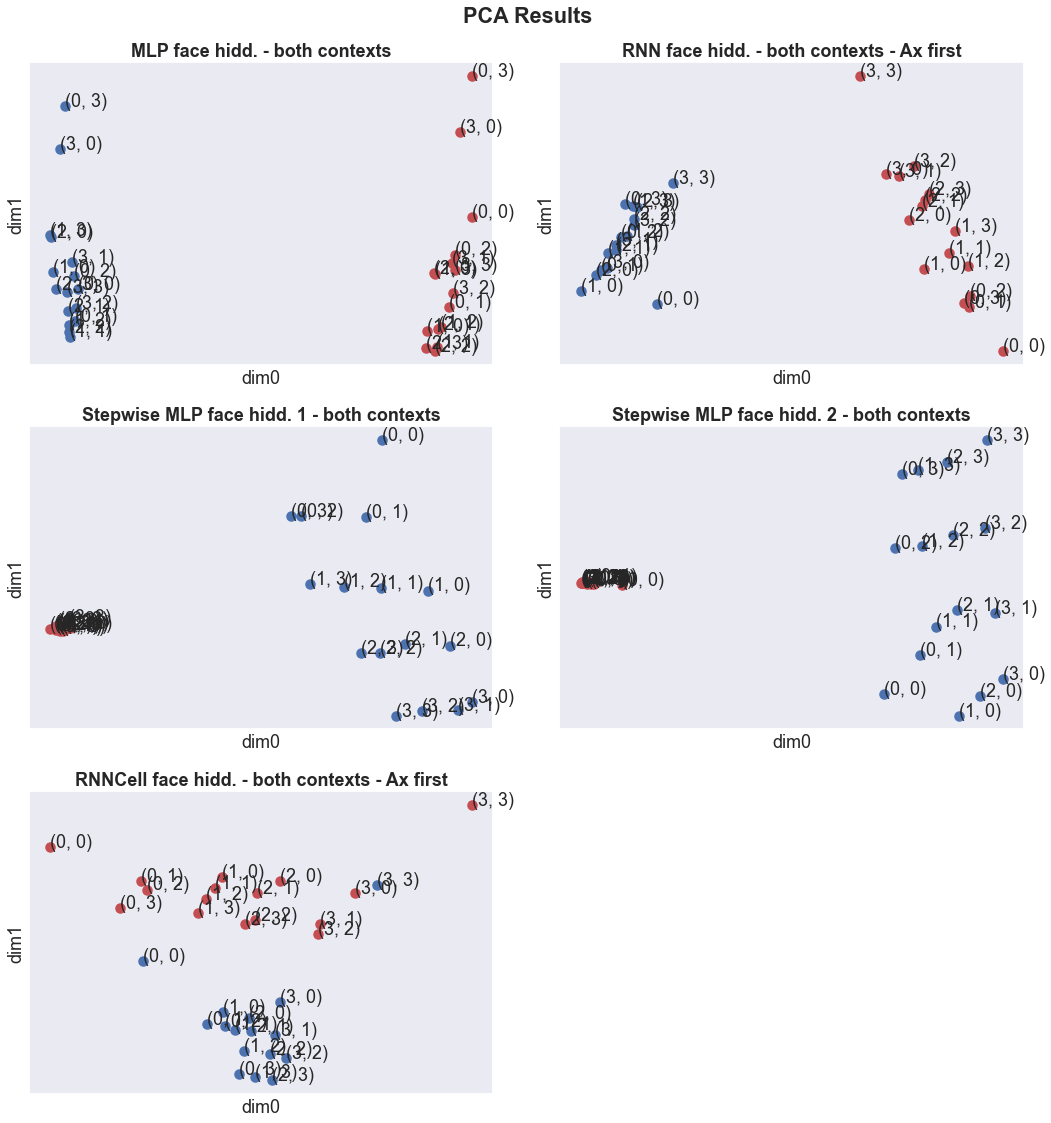

In [44]:
fig, axs = plt.subplots(3, 2, figsize=[15,16])
fig.delaxes(axs[2][1])
# fig, axs = plt.subplots(4, 3, figsize=[25,24])
# plot embeddins
# ------
# MLP
# ------
# plot pca context 0
# ctx0_hidd_2d = mlp_results['ctx0_hidd_2d']
# ax = axs[0][0]
# ax.scatter(ctx0_hidd_2d[:, dim1], ctx0_hidd_2d[:, dim2], color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (ctx0_hidd_2d[i, dim1], ctx0_hidd_2d[i, dim2]))
# ax.set_title("MLP face hidd. - context 0", fontweight='bold')

# # plot context 1
# ctx1_hidd_2d = mlp_results['ctx1_hidd_2d']
# ax = axs[0][1]
# ax.scatter(ctx1_hidd_2d[:, dim1], ctx1_hidd_2d[:, dim2], color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (ctx1_hidd_2d[i, dim1], ctx1_hidd_2d[i, dim2]))
# ax.set_title("MLP face hidd. - context 1", fontweight='bold')

# plot both contexts
ctx_hidd_2d = mlp_results['ctx_hidd_2d']
ax = axs[0][0]
half = int(ctx_hidd_2d.shape[0]/2) # the first half is for the context0
ax.scatter(ctx_hidd_2d[0:half, dim1], ctx_hidd_2d[0:half, dim2], color='r')
ax.scatter(ctx_hidd_2d[half:, dim1], ctx_hidd_2d[half:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (ctx_hidd_2d[i, dim1], ctx_hidd_2d[i, dim2]))
    ax.annotate(text, (ctx_hidd_2d[i+half, dim1], ctx_hidd_2d[i+half, dim2]))
ax.set_title("MLP face hidd. - both contexts", fontweight='bold')


# -------
# RNN
# -------
# plot pca context 0
# ctx0_hidd_2d = rnn_results['ctx0_hidd_2d']
# ax = axs[1][0]
# ax.scatter(ctx0_hidd_2d[:, dim1], ctx0_hidd_2d[:, dim2], color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (ctx0_hidd_2d[i, dim1], ctx0_hidd_2d[i, dim2]))
# ax.set_title("RNN face hidd. - context 0 - Ax %s" %(ctx_order), fontweight='bold')

# # plot context 1
# ctx1_hidd_2d = rnn_results['ctx1_hidd_2d']
# ax = axs[1][1]
# ax.scatter(ctx1_hidd_2d[:, dim1], ctx1_hidd_2d[:, dim2], color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (ctx1_hidd_2d[i, dim1], ctx1_hidd_2d[i, dim2]))
# ax.set_title("RNN face hidd. - context 1", fontweight='bold')

# plot both contexts
ctx_hidd_2d = rnn_results['ctx_hidd_2d']
ax = axs[0][1]
half = int(ctx_hidd_2d.shape[0]/2) # the first half is for the context0
ax.scatter(ctx_hidd_2d[0:half, dim1], ctx_hidd_2d[0:half, dim2], color='r')
ax.scatter(ctx_hidd_2d[half:, dim1], ctx_hidd_2d[half:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (ctx_hidd_2d[i, dim1], ctx_hidd_2d[i, dim2]))
    ax.annotate(text, (ctx_hidd_2d[i+half, dim1], ctx_hidd_2d[i+half, dim2]))
ax.set_title("RNN face hidd. - both contexts - Ax %s" %(ctx_order), fontweight='bold')

# ------
# stepwise MLP - Hidd 1
h_idx = 0
# ------
# plot pca context 0
# ctx0_hidd_2d = swmlp_results['ctx0_hidd_2d']
# px, py = ctx0_hidd_2d[h_idx,:,dim1], ctx0_hidd_2d[h_idx,:, dim2]
# ax = axs[2][0]
# ax.scatter(px, py, color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (px[i], py[i]))
# ax.set_title("Stepwise MLP face hidd. 1 - context 0", fontweight='bold')

# # plot context 1
# ctx1_hidd_2d = swmlp_results['ctx1_hidd_2d']
# px, py = ctx1_hidd_2d[h_idx,:,dim1], ctx1_hidd_2d[h_idx,:, dim2]
# ax = axs[2][1]
# ax.scatter(px, py, color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (px[i], py[i]))
# ax.set_title("Stepwise MLP face hidd. 1 - context 1", fontweight='bold')

# plot both contexts
ctx_hidd_2d = swmlp_results['ctx_hidd_2d']
ax = axs[1][0]
half = int(ctx_hidd_2d.shape[1]/2) # the first half is for the context0
ax.scatter(ctx_hidd_2d[h_idx, 0:half, dim1], ctx_hidd_2d[h_idx, 0:half, dim2], color='r')
ax.scatter(ctx_hidd_2d[h_idx, half:, dim1], ctx_hidd_2d[h_idx, half:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (ctx_hidd_2d[h_idx, i, dim1], ctx_hidd_2d[h_idx, i, dim2]))
    ax.annotate(text, (ctx_hidd_2d[h_idx, i+half, dim1], ctx_hidd_2d[h_idx, i+half, dim2]))
ax.set_title("Stepwise MLP face hidd. 1 - both contexts", fontweight='bold')


# ------
# stepwise MLP - Hidd 2
h_idx = 1
# ------
# plot pca context 0
# ctx0_hidd_2d = swmlp_results['ctx0_hidd_2d']
# px, py = ctx0_hidd_2d[h_idx,:,dim1], ctx0_hidd_2d[h_idx,:, dim2]
# ax = axs[3][0]
# ax.scatter(px, py, color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (px[i], py[i]))
# ax.set_title("Stepwise MLP face hidd. 2 - context 0", fontweight='bold')

# # plot context 1
# ctx1_hidd_2d = swmlp_results['ctx1_hidd_2d']
# px, py = ctx1_hidd_2d[h_idx,:,dim1], ctx1_hidd_2d[h_idx,:, dim2]
# ax = axs[3][1]
# ax.scatter(px, py, color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (px[i], py[i]))
# ax.set_title("Stepwise MLP face hidd. 2 - context 1", fontweight='bold')

# plot both contexts
ctx_hidd_2d = swmlp_results['ctx_hidd_2d']
ax = axs[1][1]
half = int(ctx_hidd_2d.shape[1]/2) # the first half is for the context0
ax.scatter(ctx_hidd_2d[h_idx, 0:half, dim1], ctx_hidd_2d[h_idx, 0:half, dim2], color='r')
ax.scatter(ctx_hidd_2d[h_idx, half:, dim1], ctx_hidd_2d[h_idx, half:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (ctx_hidd_2d[h_idx, i, dim1], ctx_hidd_2d[h_idx, i, dim2]))
    ax.annotate(text, (ctx_hidd_2d[h_idx, i+half, dim1], ctx_hidd_2d[h_idx, i+half, dim2]))
ax.set_title("Stepwise MLP face hidd. 2 - both contexts", fontweight='bold')

# -------
# RNNCell
# -------
# plot pca context 0
# ctx0_hidd_2d = rnncell_results['ctx0_hidd_2d']
# ax = axs[4][0]
# ax.scatter(ctx0_hidd_2d[:, dim1], ctx0_hidd_2d[:, dim2], color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (ctx0_hidd_2d[i, dim1], ctx0_hidd_2d[i, dim2]))
# ax.set_title("RNNCell face hidd. - context 0 - Ax %s" %(ctx_order), fontweight='bold')

# # plot context 1
# ctx1_hidd_2d = rnncell_results['ctx1_hidd_2d']
# ax = axs[4][1]
# ax.scatter(ctx1_hidd_2d[:, dim1], ctx1_hidd_2d[:, dim2], color='b')
# for i, loc in enumerate(locs):
#     text = str(loc)
#     ax.annotate(text, (ctx1_hidd_2d[i, dim1], ctx1_hidd_2d[i, dim2]))
# ax.set_title("RNNCell face hidd. - context 1", fontweight='bold')

# plot both contexts
ctx_hidd_2d = rnncell_results['ctx_hidd_2d']
ax = axs[2][0]
half = int(ctx_hidd_2d.shape[0]/2) # the first half is for the context0
ax.scatter(ctx_hidd_2d[0:half, dim1], ctx_hidd_2d[0:half, dim2], color='r')
ax.scatter(ctx_hidd_2d[half:, dim1], ctx_hidd_2d[half:, dim2], color='b')
for i, loc in enumerate(locs):
    text = str(loc)
    ax.annotate(text, (ctx_hidd_2d[i, dim1], ctx_hidd_2d[i, dim2]))
    ax.annotate(text, (ctx_hidd_2d[i+half, dim1], ctx_hidd_2d[i+half, dim2]))
ax.set_title("RNNCell face hidd. - both contexts - Ax %s" %(ctx_order), fontweight='bold')

for ax in axs.reshape(-1): 
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('dim%s' %(dim1))
    ax.set_ylabel('dim%s' %(dim2))

fig_str = '%s_pca_results_all_models_hidds_ctx' %(ctx_order_str)
fig.suptitle('PCA Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)

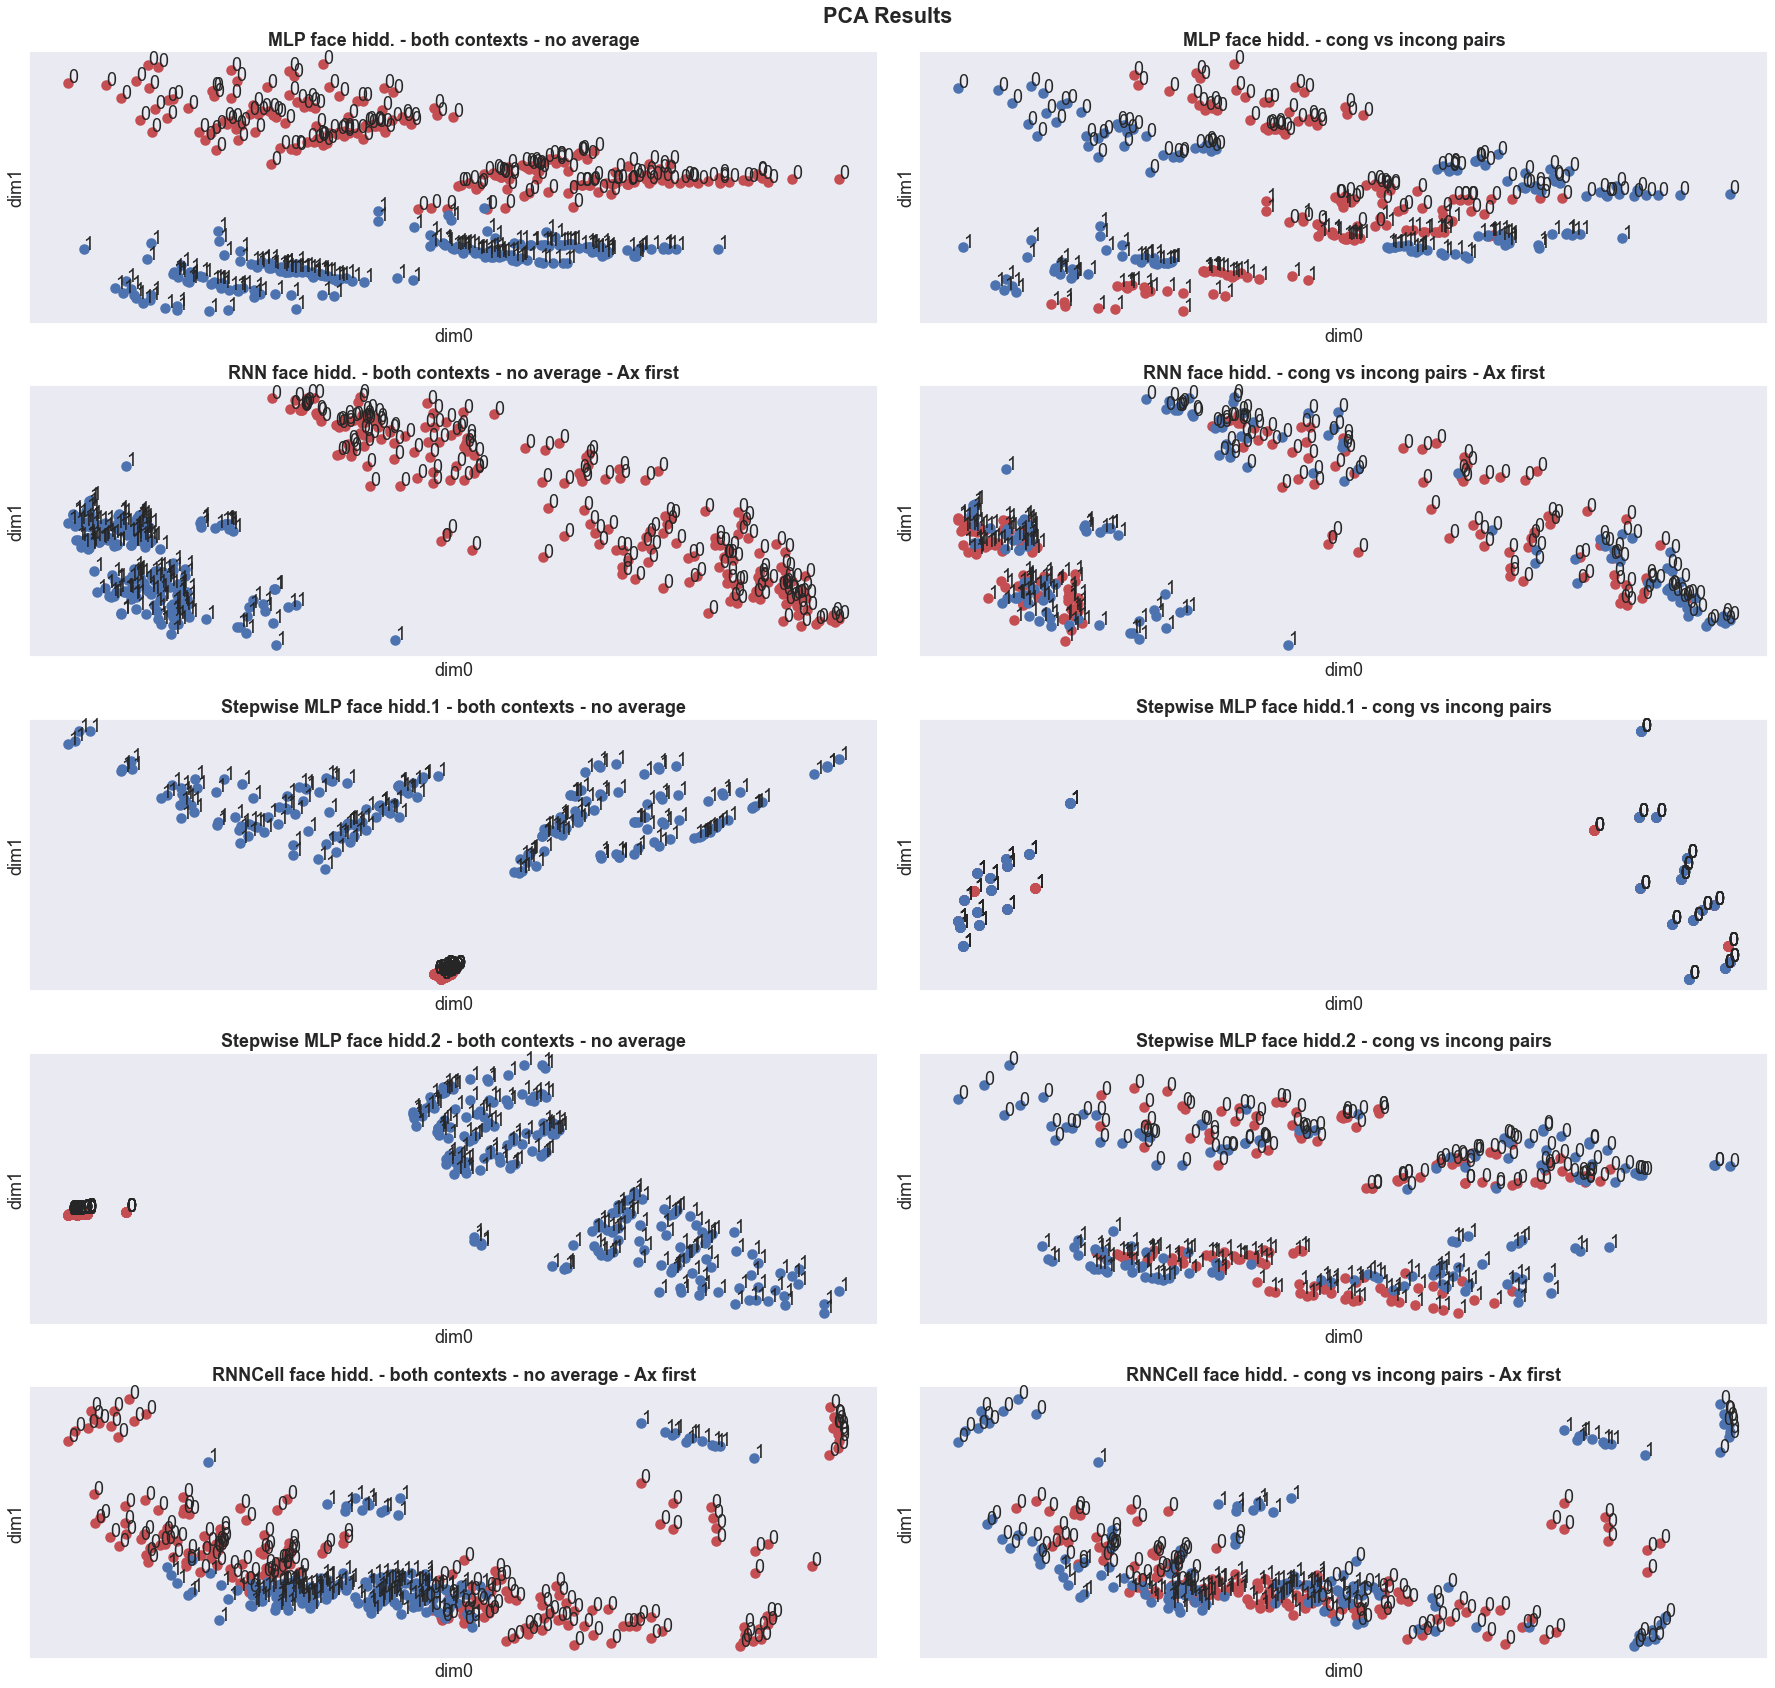

In [45]:
fig, axs = plt.subplots(5, 2, figsize=[25,24])

# plot embeddins
# mlp
# batch: [f1, f2, ctx, out, idx1, idx2]
ctx_dim = 2 # ctx pos in a batch

# plot hiddens - both contexts - no average over faces
hidd_2d = mlp_results['hidd_2d']
# ToDo: [-1] at the end is for when it is multiple runs, it picks the last run
samples_ctx = mlp_results['samples_res']['samples_ctxs']
samples_ctx = np.concatenate(np.asarray(samples_ctx), axis=0)
ax = axs[0][0]
half = int(samples_ctx.shape[0]/2)# the first half is for the context0

ax.scatter(hidd_2d[0:half, dim1], hidd_2d[0:half, dim2], color='r')
ax.scatter(hidd_2d[half:, dim1], hidd_2d[half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_ctx[i][ctx_dim][0].numpy()), (hidd_2d[i, dim1], hidd_2d[i, dim2]))
    ax.annotate(str(samples_ctx[i+half][ctx_dim][0].numpy()), (hidd_2d[i+half, dim1], hidd_2d[i+half, dim2]))
ax.set_title("MLP face hidd. - both contexts - no average", fontweight='bold')

# # plot both contexts - color coded by cong vs incong
incong_cong_2d = mlp_results['incong_cong_2d']
samples_inc_c = mlp_results['samples_res']['samples_inc_c']
ax = axs[0][1]
half = int(samples_inc_c.shape[0]/2) # the first half is for the minor pairs
ax.scatter(incong_cong_2d[0:half, dim1], incong_cong_2d[0:half, dim2], color='r')
ax.scatter(incong_cong_2d[half:, dim1], incong_cong_2d[half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_inc_c[i][ctx_dim][0].numpy()), (incong_cong_2d[i, dim1], incong_cong_2d[i, dim2]))
    ax.annotate(str(samples_inc_c[i+half][ctx_dim][0].numpy()), (incong_cong_2d[i+half, dim1], incong_cong_2d[i+half, dim2]))
ax.set_title("MLP face hidd. - cong vs incong pairs", fontweight='bold')

# -------
# RNN
# -------
# plot hiddens - both contexts - no average over faces
hidd_2d = rnn_results['hidd_2d']
samples_ctx = rnn_results['samples_res']['samples_ctxs']
samples_ctx = np.concatenate(np.asarray(samples_ctx), axis=0)
ax = axs[1][0]
half = int(samples_ctx.shape[0]/2) # the first half is for the context0

ax.scatter(hidd_2d[0:half, dim1], hidd_2d[0:half, dim2], color='r')
ax.scatter(hidd_2d[half:, dim1], hidd_2d[half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_ctx[i][ctx_dim][0].numpy()), (hidd_2d[i, dim1], hidd_2d[i, dim2]))
    ax.annotate(str(samples_ctx[i+half][ctx_dim][0].numpy()), (hidd_2d[i+half, dim1], hidd_2d[i+half, dim2]))
ax.set_title("RNN face hidd. - both contexts - no average - Ax %s" %(ctx_order), fontweight='bold')

# # plot both contexts - color coded by cong vs incong
incong_cong_2d = rnn_results['incong_cong_2d']
samples_inc_c = rnn_results['samples_res']['samples_inc_c']
ax = axs[1][1]
half = int(samples_inc_c.shape[0]/2) # the first half is for the minor pairs
ax.scatter(incong_cong_2d[0:half, dim1], incong_cong_2d[0:half, dim2], color='r')
ax.scatter(incong_cong_2d[half:, dim1], incong_cong_2d[half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_inc_c[i][ctx_dim][0].numpy()), (incong_cong_2d[i, dim1], incong_cong_2d[i, dim2]))
    ax.annotate(str(samples_inc_c[i+half][ctx_dim][0].numpy()), (incong_cong_2d[i+half, dim1], incong_cong_2d[i+half, dim2]))
ax.set_title("RNN face hidd. - cong vs incong pairs - Ax %s" %(ctx_order), fontweight='bold')

# -------
# Stepwise MLP - hidd 1
# -------
ctx_dim = 2
h_ind = 0
# plot hiddens - both contexts - no average over faces
hidd_2d = swmlp_results['hidd_2d']
samples_ctx = swmlp_results['samples_res']['samples_ctxs']
samples_ctx = np.concatenate(np.asarray(samples_ctx), axis=0)
ax = axs[2][0]
half = int(samples_ctx.shape[0]/2) # the first half is for the context0

ax.scatter(hidd_2d[h_ind, 0:half, dim1], hidd_2d[h_ind, 0:half, dim2], color='r')
ax.scatter(hidd_2d[h_ind, half:, dim1], hidd_2d[h_ind, half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_ctx[i][ctx_dim][0].numpy()), (hidd_2d[h_ind, i, dim1], hidd_2d[h_ind, i, dim2]))
    ax.annotate(str(samples_ctx[i+half][ctx_dim][0].numpy()), (hidd_2d[h_ind, i+half, dim1], hidd_2d[h_ind, i+half, dim2]))
ax.set_title("Stepwise MLP face hidd.1 - both contexts - no average", fontweight='bold')

# # plot both contexts - color coded by cong vs incong
incong_cong_2d = swmlp_results['incong_cong_2d']
samples_inc_c = swmlp_results['samples_res']['samples_inc_c']
ax = axs[2][1]
half = int(samples_inc_c.shape[0]/2) # the first half is for the minor pairs
ax.scatter(incong_cong_2d[h_ind, 0:half, dim1], incong_cong_2d[h_ind, 0:half, dim2], color='r')
ax.scatter(incong_cong_2d[h_ind, half:, dim1], incong_cong_2d[h_ind, half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_inc_c[i][ctx_dim][0].numpy()), (incong_cong_2d[h_ind, i, dim1], incong_cong_2d[h_ind, i, dim2]))
    ax.annotate(str(samples_inc_c[i+half][ctx_dim][0].numpy()), (incong_cong_2d[h_ind, i+half, dim1], incong_cong_2d[h_ind, i+half, dim2]))
ax.set_title("Stepwise MLP face hidd.1 - cong vs incong pairs", fontweight='bold')

# -------
# Stepwise MLP - hidd 2
# -------
ctx_dim = 2
h_ind = 1
# plot hiddens - both contexts - no average over faces
hidd_2d = swmlp_results['hidd_2d']
samples_ctx = swmlp_results['samples_res']['samples_ctxs']
samples_ctx = np.concatenate(np.asarray(samples_ctx), axis=0)
ax = axs[3][0]
half = int(samples_ctx.shape[0]/2) # the first half is for the context0

ax.scatter(hidd_2d[h_ind, 0:half, dim1], hidd_2d[h_ind, 0:half, dim2], color='r')
ax.scatter(hidd_2d[h_ind, half:, dim1], hidd_2d[h_ind, half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_ctx[i][ctx_dim][0].numpy()), (hidd_2d[h_ind, i, dim1], hidd_2d[h_ind, i, dim2]))
    ax.annotate(str(samples_ctx[i+half][ctx_dim][0].numpy()), (hidd_2d[h_ind, i+half, dim1], hidd_2d[h_ind, i+half, dim2]))
ax.set_title("Stepwise MLP face hidd.2 - both contexts - no average", fontweight='bold')

# # plot both contexts - color coded by cong vs incong
incong_cong_2d = swmlp_results['incong_cong_2d']
samples_inc_c = swmlp_results['samples_res']['samples_inc_c']
ax = axs[3][1]
half = int(samples_inc_c.shape[0]/2) # the first half is for the minor pairs
ax.scatter(incong_cong_2d[h_ind, 0:half, dim1], incong_cong_2d[h_ind, 0:half, dim2], color='r')
ax.scatter(incong_cong_2d[h_ind, half:, dim1], incong_cong_2d[h_ind, half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_inc_c[i][ctx_dim][0].numpy()), (incong_cong_2d[h_ind, i, dim1], incong_cong_2d[h_ind, i, dim2]))
    ax.annotate(str(samples_inc_c[i+half][ctx_dim][0].numpy()), (incong_cong_2d[h_ind, i+half, dim1], incong_cong_2d[h_ind, i+half, dim2]))
ax.set_title("Stepwise MLP face hidd.2 - cong vs incong pairs", fontweight='bold')

# -------
# RNNCell
# -------
# plot hiddens - both contexts - no average over faces
hidd_2d = rnncell_results['hidd_2d']
samples_ctx = rnncell_results['samples_res']['samples_ctxs']
samples_ctx = np.concatenate(np.asarray(samples_ctx), axis=0)
ax = axs[4][0]
half = int(hidd_2d.shape[0]/2) # the first half is for the context0

ax.scatter(hidd_2d[0:half, dim1], hidd_2d[0:half, dim2], color='r')
ax.scatter(hidd_2d[half:, dim1], hidd_2d[half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_ctx[i][ctx_dim][0].numpy()), (hidd_2d[i, dim1], hidd_2d[i, dim2]))
    ax.annotate(str(samples_ctx[i+half][ctx_dim][0].numpy()), (hidd_2d[i+half, dim1], hidd_2d[i+half, dim2]))
ax.set_title("RNNCell face hidd. - both contexts - no average - Ax %s" %(ctx_order), fontweight='bold')

# # plot both contexts - color coded by cong vs incong
incong_cong_2d = rnncell_results['incong_cong_2d']
samples_inc_c = rnncell_results['samples_res']['samples_inc_c']
ax = axs[4][1]
half = int(samples_inc_c.shape[0]/2) # the first half is for the minor pairs
ax.scatter(incong_cong_2d[0:half, dim1], incong_cong_2d[0:half, dim2], color='r')
ax.scatter(incong_cong_2d[half:, dim1], incong_cong_2d[half:, dim2], color='b')
for i  in range(half):
    ax.annotate(str(samples_inc_c[i][ctx_dim][0].numpy()), (incong_cong_2d[i, dim1], incong_cong_2d[i, dim2]))
    ax.annotate(str(samples_inc_c[i+half][ctx_dim][0].numpy()), (incong_cong_2d[i+half, dim1], incong_cong_2d[i+half, dim2]))
ax.set_title("RNNCell face hidd. - cong vs incong pairs - Ax %s" %(ctx_order), fontweight='bold')

for ax in axs.flatten():
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('dim%s' %(dim1))
    ax.set_ylabel('dim%s' %(dim2))

fig_str = '%s_pca_results_all_models_hidds_inc_c_ctx' %(ctx_order_str)
fig.suptitle('PCA Results', fontweight='bold')
plt.tight_layout()
fig.savefig(('../../figures/' + fig_str + '.pdf'), 
            bbox_inches = 'tight', pad_inches = 0)
fig.savefig(('../../figures/' + fig_str + '.png'), 
            bbox_inches = 'tight', pad_inches = 0)